In [9]:
import numpy as np
import zarr
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [46]:
data = zarr.load("./data/mimicry_2024-06-14_23-20-22.zarr/")

In [48]:
s = data['s']
v = data['v']
d = data['d']

In [97]:
s_weighted = []
d_mean = []
s_mimic = []
for t in range(len(s)):
    s_t = s[t]
    d_t = d[t]
    v_t = v[t]
    s_weighted += [(s_t[:100].T * v_t).mean(1)]
    s_mimic += [s_t[100:].mean(0)]
    d_mean += [d_t.mean(0)]
s_weighted = np.array(s_weighted)
s_mimic = np.array(s_mimic)
d_mean = np.array(d_mean)

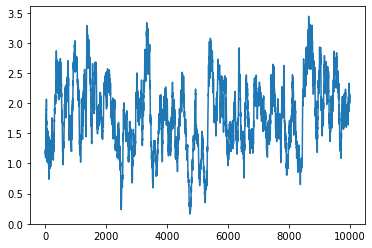

In [112]:
# Correlation between mimic and s_weighted over time
y_1 = []
for i in range(len(s_mimic)):
    a = s_weighted[i]
    b = s_mimic[i]
    v_sim = np.dot(a, b)
    y_1.append(v_sim)

plt.plot(range(len(s_mimic)), y_1)

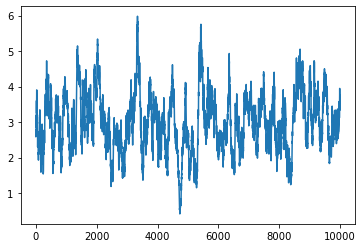

In [113]:
# Correlation between mimic and s_weighted over time
y_2 = []
for i in range(len(s_mimic)):
    a = d_mean[i]
    b = s_mimic[i]
    v_sim = np.dot(a, b)
    y_2.append(v_sim)

plt.plot(range(len(s_mimic)), y_2)

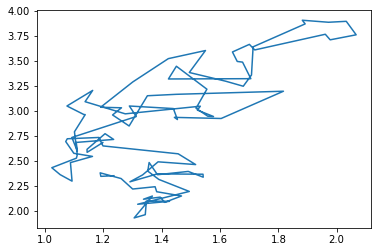

In [122]:
plt.plot(y_1[:100], y_2[:100])

In [104]:
for index in range(s[0].shape[1]):
    print(f"\n {index} \n")
    for lag in np.arange(0, 10, 1):
        if lag == 0:
            x = s_weighted[:, index]
        else:
            x = s_weighted[:-lag, index]
        y = s_mimic[lag:, index]

        df = pd.DataFrame({'x':x, 'y':y})
        corr = df.corr().loc['x', 'y']

        print(f"lag: {lag}, corr: {corr:.3f}")


 0 

lag: 0, corr: 0.708
lag: 1, corr: 0.708
lag: 2, corr: 0.708
lag: 3, corr: 0.707
lag: 4, corr: 0.705
lag: 5, corr: 0.704
lag: 6, corr: 0.702
lag: 7, corr: 0.700
lag: 8, corr: 0.697
lag: 9, corr: 0.695

 1 

lag: 0, corr: 0.809
lag: 1, corr: 0.809
lag: 2, corr: 0.808
lag: 3, corr: 0.807
lag: 4, corr: 0.805
lag: 5, corr: 0.803
lag: 6, corr: 0.801
lag: 7, corr: 0.799
lag: 8, corr: 0.796
lag: 9, corr: 0.793

 2 

lag: 0, corr: 0.749
lag: 1, corr: 0.748
lag: 2, corr: 0.747
lag: 3, corr: 0.744
lag: 4, corr: 0.742
lag: 5, corr: 0.739
lag: 6, corr: 0.736
lag: 7, corr: 0.732
lag: 8, corr: 0.729
lag: 9, corr: 0.724

 3 

lag: 0, corr: 0.776
lag: 1, corr: 0.776
lag: 2, corr: 0.776
lag: 3, corr: 0.775
lag: 4, corr: 0.774
lag: 5, corr: 0.773
lag: 6, corr: 0.771
lag: 7, corr: 0.769
lag: 8, corr: 0.767
lag: 9, corr: 0.765

 4 

lag: 0, corr: 0.701
lag: 1, corr: 0.700
lag: 2, corr: 0.699
lag: 3, corr: 0.697
lag: 4, corr: 0.695
lag: 5, corr: 0.693
lag: 6, corr: 0.690
lag: 7, corr: 0.687
lag: 8, co

In [86]:
df.corr()

,x,y
x,1.000000,-0.060194
y,-0.060194,1.000000
